In [63]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
# May take a few seconds to run since the dataset is large
df = pd.read_excel('stock_data_super_large.xlsx')
df_risk_free = pd.read_excel('10_year_yield_US.xls')
df_mkt = pd.read_excel('SPY_data_final.xls', sheet_name = 'SPY_data')


In [26]:
# We have around 4000 companies in the dataset, 188 columns 
df.head()

,Identifier (RIC),Company Name,Industry,ESG_FY0,ESG_FY1,ESG_FY2,ESG_FY3,ESG_FY4,ESG_FY5,ESG_FY6,...,MCAP_FQ22,MCAP_FQ23,MCAP_FQ24,MCAP_FQ25,MCAP_FQ26,MCAP_FQ27,MCAP_FQ28,MCAP_FQ29,MCAP_FQ30,MCAP_FQ31
0,B,Barnes Group Inc,Machinery,47.280059,39.716448,39.364964,33.635145,24.153344,25.935442,18.761357,...,2.758021e+09,2.551881e+09,2.183471e+09,1.778151e+09,1.880405e+09,1.942959e+09,1.971735e+09,2.136121e+09,2.218038e+09,2.015078e+09
1,ITT.N,ITT Inc,Machinery,78.612516,70.722850,68.409017,59.747878,58.301170,54.710253,58.075415,...,3.637016e+09,3.401874e+09,3.211264e+09,2.881398e+09,3.313802e+09,3.250640e+09,2.988642e+09,3.732128e+09,3.607767e+09,3.706136e+09
2,GTLS.N,Chart Industries Inc,Machinery,56.790911,43.968150,41.893694,16.687256,21.707709,24.478215,NaN,...,1.073148e+09,1.102080e+09,1.004369e+09,7.381859e+08,6.643657e+08,5.485793e+08,5.867633e+08,1.091904e+09,1.071162e+09,1.042462e+09
3,PKOH.OQ,Park Ohio Holdings Corp,Machinery,11.351879,12.015005,12.092304,12.603972,12.932632,2.580297,NaN,...,4.514671e+08,5.277162e+08,4.575630e+08,3.473865e+08,5.381970e+08,4.654001e+08,3.641802e+08,6.055063e+08,6.581418e+08,7.885708e+08
4,ZWS.N,Zurn Elkay Water Solutions Corp,Building Products,61.015179,59.600678,42.460351,22.930730,21.765882,22.323763,NaN,...,2.371729e+09,2.013093e+09,2.199966e+09,1.996711e+09,2.049765e+09,1.818622e+09,1.703909e+09,2.434572e+09,2.714624e+09,2.868755e+09


In [27]:
# find the average market cap for each company, column lables MCAP_FY0 ~ MCAP_FY7
df['avg_mcap'] = df.loc[:,'MCAP_FQ0':'MCAP_FQ31'].mean(axis=1)
# same for ESG score
df['avg_esg'] = df.loc[:,'ESG_FY0':'ESG_FY6'].mean(axis=1)
# same for price
df['avg_price'] = df.loc[:,'Price_CM0':'Price_CM96'].mean(axis=1)
# book to market ratio
df['avg_btm'] = df.loc[:,'BTM_FQ0':'BTM_FQ31'].mean(axis=1)

In [28]:
# produce two dataframes, one with market cap lower than the median, one with market cap higher than the median
df_mcap_low = df[df['avg_mcap'] < df['avg_mcap'].median()]
df_mcap_high = df[df['avg_mcap'] >= df['avg_mcap'].median()]

# produce two dataframes, one with Price / Book Value Per Share lower than the median, one with Price / Book Value Per Share higher than the median
df_BM_low = df[df['avg_btm'] < df['avg_btm'].median()]
df_BM_high = df[df['avg_btm'] >= df['avg_btm'].median()]

# now for ESG score
df_esg_low = df[df['avg_esg'] < df['avg_esg'].median()]
df_esg_high = df[df['avg_esg'] >= df['avg_esg'].median()]

In [29]:
# check how many rows are in each dataframe
print(df_mcap_low.shape)

(2105, 219)


In [30]:
# find the return of each company for each CM period
# take in one dataframe, two integers, and two strings
def get_return(df, start, end, high_low, feature, freq):
    '''
    @param
    df: dataframe
    start: start period
    end: end period
    high_low: 'high' or 'low'
    feature: Default 'Price'
    freq: 'CM' or 'FY' or 'FQ'
    @return
    a dataframe with the return of each company for each CM period
    '''
    for i in range(start+1, end+1):
        df[feature+"_"+'Return_'+ freq + str(i)+"_"+high_low] = (df[feature + "_" + freq + str(i)] - df[feature + "_" + freq + str(i-1)]) / df[feature + "_" + freq  + str(i-1)]
    return df

In [31]:
# Market cap:
df_mcap_low_return = get_return(df_mcap_low, 0, 96, 'low', 'Price', 'CM')
df_mcap_high_return = get_return(df_mcap_high, 0, 96, 'high', 'Price', 'CM')

# ESG score:
df_esg_low_return = get_return(df_esg_low, 0, 96, 'low', 'Price', 'CM')
df_esg_high_return = get_return(df_esg_high, 0, 96, 'high', 'Price', 'CM')

# Price / Book Value Per Share:
df_BM_low_return = get_return(df_BM_low, 0, 96, 'low', 'Price', 'CM')
df_BM_high_return = get_return(df_BM_high, 0, 96, 'high', 'Price', 'CM')

/var/folders/7f/zzvg3mdj425g3y3pzll4q80h0000gn/T/ipykernel_31507/186932041.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature+"_"+'Return_'+ freq + str(i)+"_"+high_low] = (df[feature + "_" + freq + str(i)] - df[feature + "_" + freq + str(i-1)]) / df[feature + "_" + freq  + str(i-1)]


In [32]:
# function to only include the last 96 columns (price data) and the second and third columns (company name and industry)
def get_price_data(df):
    '''
    @param
    df: dataframe
    @return
    a dataframe with only the price data and company name and industry, with NaNs dropped
    '''
    return df.iloc[:, [1, 2] + list(range(-96, 0))].dropna()

In [33]:
# market cap
df_mcap_low_dataset = get_price_data(df_mcap_low_return)
df_mcap_high_dataset = get_price_data(df_mcap_high_return)

# ESG score
df_esg_low_dataset = get_price_data(df_esg_low_return)
df_esg_high_dataset = get_price_data(df_esg_high_return)

# Price / Book Value Per Share
df_BM_low_dataset = get_price_data(df_BM_low_return)
df_BM_high_dataset = get_price_data(df_BM_high_return)


In [34]:
# this function find the average return for each CM period for each group
def get_return_avg(df, high_low):
    '''
    @param
    df: dataframe
    high_low: 'high' or 'low'
    @return
    a dataframe with the average return for each CM period for each group
    '''
    return df.loc[:,'Price_Return_CM1_'+high_low:'Price_Return_CM96_'+high_low].mean(axis=0).to_frame().T

def get_return_spread(df_low, df_high):
    '''
    @param
    df_low: dataframe of the low group
    df_high: dataframe of the high group
    @return
    a dataframe of the difference in average returns between the high and low groups
    '''
    # for each CM period, find the difference in average returns between the high and low groups (COLUMNS) and put them in a column with as SMB_1, SMB_2, etc.
    df_spread = pd.DataFrame()
    for i in range(0, 96):
        df_spread['CM'+str(i+1)] = df_low.iloc[:,i] - df_high.iloc[:,i]
    return df_spread
    


In [35]:
# calculate the difference in returns between each high and low group
# market cap
df_mcap_low_return_avg = get_return_avg(df_mcap_low_dataset, 'low')
df_mcap_high_return_avg = get_return_avg(df_mcap_high_dataset, 'high')
df_SMB_spread_mcap = get_return_spread(df_mcap_low_return_avg, df_mcap_high_return_avg).T.rename(columns={0: 'SMB'})

# ESG score
df_esg_low_return_avg = get_return_avg(df_esg_low_dataset, 'low')
df_esg_high_return_avg = get_return_avg(df_esg_high_dataset, 'high')
df_ESG_spread_esg = get_return_spread(df_esg_low_return_avg, df_esg_high_return_avg).T.rename(columns={0: 'ESG'})

# Price / Book Value Per Share
df_BM_low_return_avg = get_return_avg(df_BM_low_dataset, 'low')
df_BM_high_return_avg = get_return_avg(df_BM_high_dataset, 'high')
df_HML_spread_BM = get_return_spread(df_BM_low_return_avg, df_BM_high_return_avg).T.rename(columns={0: 'HML'})

In [36]:
# Now for Market return and Risk free rate
# calculate returns for both the market and risk free rate
df_risk_free_return = get_price_data(get_return(df_risk_free, 0, 96, 'na', 'Rf', 'CM')).T
df_mkt_return = get_price_data(get_return(df_mkt, 0, 96, 'na', 'Rm', 'CM')).T

# only include the last 96 rows (price data)
df_risk_free_return = df_risk_free_return.iloc[-96:].T
df_mkt_return = df_mkt_return.iloc[-96:].T

# find the get_return_spread
df_mkt_spread = get_return_spread(df_mkt_return, df_risk_free_return).T.rename(columns={0: 'Rm-Rf'})

In [57]:
# read in mutual fund data
df_mutual = pd.read_excel('./Mutual_Fund_Data/mutual_fund_returns_WRDS.xlsx')
# pivot so that the dates are column names
df_mutual_pivot = df_mutual.pivot_table(index='ticker', columns='Date', values='Total Return per Share as of Month End').iloc[:, ::-1]
# rename columns in CM format 
df_mutual_pivot.columns = ['CM'+str(i+1) for i in range(0, 96)]
df_mutual_pivot.head()

,CM1,CM2,CM3,CM4,CM5,CM6,CM7,CM8,CM9,CM10,...,CM87,CM88,CM89,CM90,CM91,CM92,CM93,CM94,CM95,CM96
ticker,,,,,,,,,,,,,,,,,,,,,
AADEX,-0.094924,-0.023828,0.070445,-0.095900,0.041953,-0.065241,0.018519,-0.016780,-0.007793,0.058828,...,0.002713,-0.023833,0.009018,0.022192,-0.014800,0.065210,-0.041552,-0.002429,0.020827,0.011669
ABVYX,-0.092570,-0.012628,0.068080,-0.084656,0.021008,-0.051793,0.022701,-0.012076,-0.015289,0.054529,...,0.002088,-0.015079,0.013899,0.009116,-0.013149,0.053207,-0.045233,0.005145,0.018908,0.015647
ACAAX,-0.098782,-0.042746,0.123181,-0.086802,-0.034630,-0.144790,0.015219,-0.031632,-0.111182,-0.010644,...,0.024624,-0.011271,0.034033,-0.008780,0.001388,0.066634,-0.013151,-0.006985,0.033722,0.013585
ACEHX,-0.098478,-0.029501,0.022941,-0.086312,0.042332,-0.031874,0.051508,-0.042108,0.002764,0.072027,...,-0.005358,-0.041984,0.001456,0.020080,-0.020950,0.053236,-0.020234,-0.010825,-0.006420,-0.020015
ACFOX,-0.091997,-0.035585,0.139764,-0.087750,-0.055267,-0.154384,0.043125,-0.027158,-0.119872,-0.033531,...,-0.006414,-0.023904,0.017371,0.019481,-0.007616,0.049815,-0.016334,0.004559,0.034739,0.006242


In [59]:
# find the average return for each CM period
df_mutual_avg = df_mutual_pivot.mean(axis=0).to_frame().T
df_mutual_avg.head()

# find the difference in returns between the df_mutual_avg (starts at CM2, ends at CM ) and risk free rate
df_RiRf_spread = pd.DataFrame()
for i in range(0, 96):
    df_RiRf_spread['CM'+str(i+1)] = df_mutual_avg.iloc[:,i] - df_risk_free_return.iloc[:,i]

# rename columns
df_RiRf_spread = df_RiRf_spread.T.rename(columns={0: 'Ri-Rf'})

df_RiRf_spread.head()

,Ri-Rf
CM1,-0.024963
CM2,0.139793
CM3,0.240242
CM4,-0.199608
CM5,0.042496


In [62]:
# merge the three spreads into one dataframe
df_spread = pd.concat([df_RiRf_spread, df_mkt_spread, df_SMB_spread_mcap, df_HML_spread_BM, df_ESG_spread_esg], axis=1)
df_spread.head()

,Ri-Rf,Rm-Rf,SMB,HML,ESG
CM1,-0.024963,0.025787,0.341720,-0.201218,0.050614
CM2,0.139793,0.102379,0.580534,-0.220284,0.071926
CM3,0.240242,0.258770,1.221287,-0.841069,-0.004384
CM4,-0.199608,-0.073567,0.418568,-0.170619,0.027457
CM5,0.042496,-0.040698,-0.001379,0.031242,0.014261


In [61]:
# export to excel
# df_spread.to_excel('fama-french-full.xlsx')

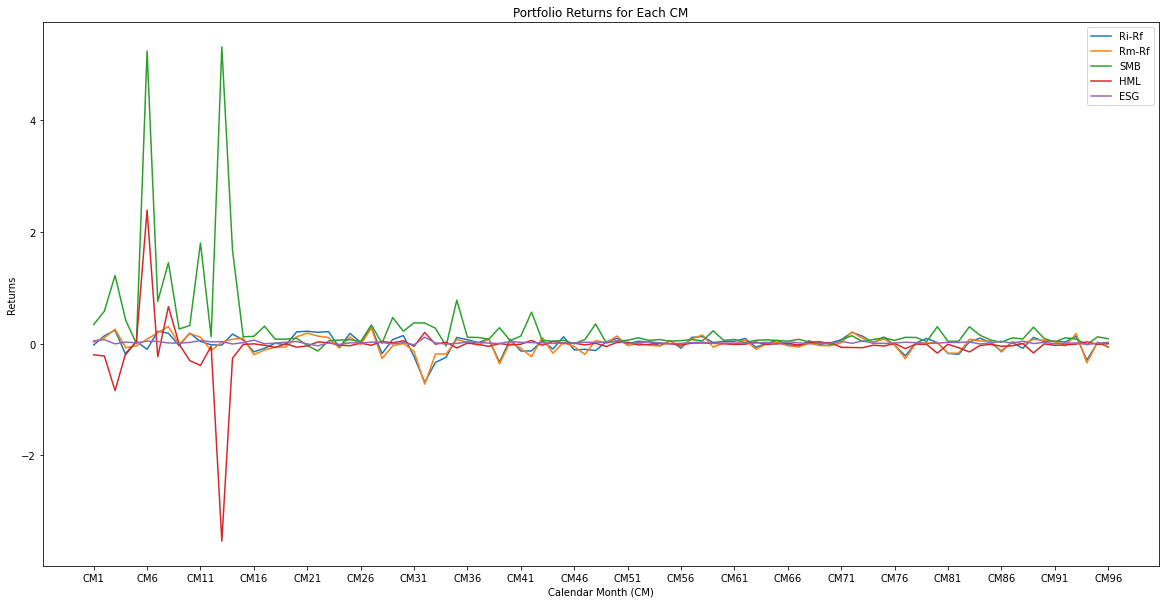

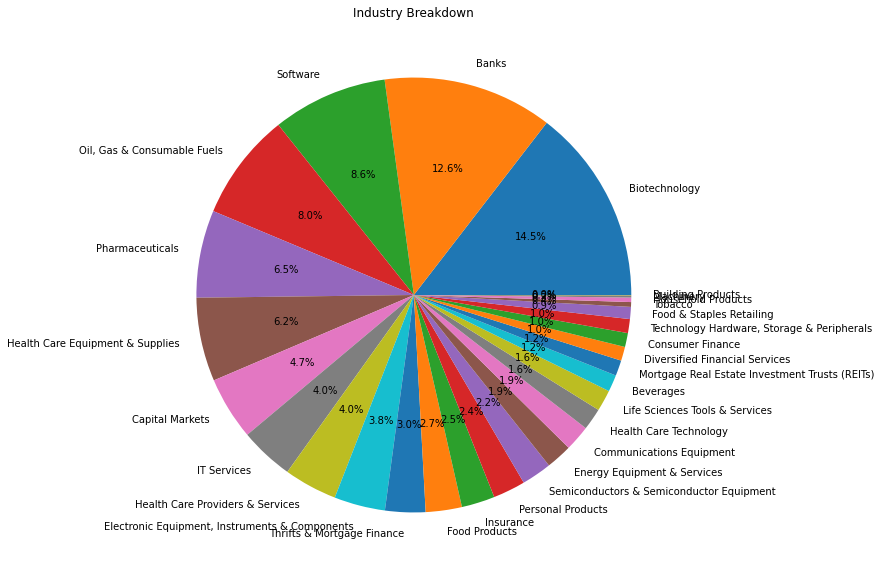

In [76]:
# summary statistics with plots
df_spread.describe()

# plot the average returns for each CM period, make the plot pretty
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_spread.index, df_spread['Ri-Rf'], label='Ri-Rf')
ax.plot(df_spread.index, df_spread['Rm-Rf'], label='Rm-Rf')
ax.plot(df_spread.index, df_spread['SMB'], label='SMB')
ax.plot(df_spread.index, df_spread['HML'], label='HML')
ax.plot(df_spread.index, df_spread['ESG'], label='ESG')
ax.set_xlabel('Calendar Month (CM)')
ax.set_ylabel('Returns')
ax.set_title('Portfolio Returns for Each CM')
ax.legend()
# set the x interval to be larger
ax.set_xticks(np.arange(0, 96, 5))
plt.show()


# from df, find the  summary statistics for industry column
df_industry = df[['Identifier (RIC)', 'Industry']]
df_industry = df_industry.groupby('Industry').count().sort_values(by='Identifier (RIC)', ascending=False)

# plot the summary statistics in pie chart
fig, ax = plt.subplots(figsize=(20,10))
ax.pie(df_industry['Identifier (RIC)'], labels=df_industry.index, autopct='%1.1f%%')
ax.set_title('Industry Breakdown')
plt.show()



In [70]:
df.head()

,Identifier (RIC),Company Name,Industry,ESG_FY0,ESG_FY1,ESG_FY2,ESG_FY3,ESG_FY4,ESG_FY5,ESG_FY6,...,MCAP_FQ26,MCAP_FQ27,MCAP_FQ28,MCAP_FQ29,MCAP_FQ30,MCAP_FQ31,avg_mcap,avg_esg,avg_price,avg_btm
0,B,Barnes Group Inc,Machinery,47.280059,39.716448,39.364964,33.635145,24.153344,25.935442,18.761357,...,1.880405e+09,1.942959e+09,1.971735e+09,2.136121e+09,2.218038e+09,2.015078e+09,2.464269e+09,32.692394,47.286804,1.968428
1,ITT.N,ITT Inc,Machinery,78.612516,70.722850,68.409017,59.747878,58.301170,54.710253,58.075415,...,3.313802e+09,3.250640e+09,2.988642e+09,3.732128e+09,3.607767e+09,3.706136e+09,4.906978e+09,64.082728,56.745052,2.759725
2,GTLS.N,Chart Industries Inc,Machinery,56.790911,43.968150,41.893694,16.687256,21.707709,24.478215,NaN,...,6.643657e+08,5.485793e+08,5.867633e+08,1.091904e+09,1.071162e+09,1.042462e+09,2.595050e+09,34.254323,75.573351,2.141860
3,PKOH.OQ,Park Ohio Holdings Corp,Machinery,11.351879,12.015005,12.092304,12.603972,12.932632,2.580297,NaN,...,5.381970e+08,4.654001e+08,3.641802e+08,6.055063e+08,6.581418e+08,7.885708e+08,4.135694e+08,10.596015,32.820309,1.608353
4,ZWS.N,Zurn Elkay Water Solutions Corp,Building Products,61.015179,59.600678,42.460351,22.930730,21.765882,22.323763,NaN,...,2.049765e+09,1.818622e+09,1.703909e+09,2.434572e+09,2.714624e+09,2.868755e+09,3.286381e+09,38.349430,15.984639,3.671935


In [66]:
## Regression
# first, add a constant
df_spread = sm.add_constant(df_spread)
df_spread.head()

# run the regression
model = sm.OLS(df_spread['Ri-Rf'], df_spread[['const', 'Rm-Rf', 'SMB', 'HML', 'ESG']])

# get the results
results = model.fit()

## Results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Ri-Rf   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     135.1
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           2.10e-37
Time:                        14:02:59   Log-Likelihood:                 141.01
No. Observations:                  96   AIC:                            -272.0
Df Residuals:                      91   BIC:                            -259.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0241      0.008      3.156      0.0

/Users/frankzhu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
